# Project 3: Poisonous mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 observations, where each mushroom is described by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. Since all the observations are categorical, I've binarized the feature space. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using KMeans and density estimation with Gaussian Mixture Models. Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import mixture
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

Load feature names.

In [2]:
feature_names = []
with open('/Users/debalinamaiti/Documents/GraduateStudy/MIDS/W207/Projects/3/Data/mushroom.map') as fmap:
    for line in fmap:
        [index, name, junk] = line.split()
        feature_names.append(name)

print ('Loaded feature names:', len(feature_names))

Loaded feature names: 126


Load data. The data is sparse in the input file, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [3]:
X, Y = [], []

with open('/Users/debalinamaiti/Documents/GraduateStudy/MIDS/W207/Projects/3/Data/mushroom.data') as fdata:
    for line in fdata:
        items = line.split()
        Y.append(int(items.pop(0)))
        x = np.zeros(len(feature_names))
        for item in items:
            feature = int(item.split(':')[0])
            x[feature] = 1
        X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print (X.shape, train_data.shape, test_data.shape)

(8124, 126) (7000, 126) (1124, 126)


In [4]:
### Dimensionality reduction

X_2d = PCA(n_components=2).fit_transform(X)
train_data_2d = X_2d[:7000]
test_data_2d = X_2d[7000:]
print(X_2d.shape, train_data_2d.shape, test_data_2d.shape)

(8124, 2) (7000, 2) (1124, 2)


(1) Run Principal Components Analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 50].

In [5]:
### def P1()

np.random.seed(0)

for k in range(1,51):
    pca_p1 = PCA(n_components=k)
    pca_p1.fit_transform(train_data)

#print (pca.explained_variance_)
#print (pca.explained_variance_ratio_)
    print ("For k={}, fraction of the total variance in the training data: {}".format(k, sum(pca_p1.explained_variance_ratio_)))
    
### P1()

For k=1, fraction of the total variance in the training data: 0.16404331279334158
For k=2, fraction of the total variance in the training data: 0.2972781014877742
For k=3, fraction of the total variance in the training data: 0.3990126667089819
For k=4, fraction of the total variance in the training data: 0.46964623105026004
For k=5, fraction of the total variance in the training data: 0.5083126847499477
For k=6, fraction of the total variance in the training data: 0.5451206971080614
For k=7, fraction of the total variance in the training data: 0.5764030666143098
For k=8, fraction of the total variance in the training data: 0.6037403611795216
For k=9, fraction of the total variance in the training data: 0.629904983164765
For k=10, fraction of the total variance in the training data: 0.6522145336944174
For k=11, fraction of the total variance in the training data: 0.6726958250894378
For k=12, fraction of the total variance in the training data: 0.6913734139013207
For k=13, fraction of th

(2) PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and plot it. Show the positive (poisonous) cases in blue and the negative (non-poisonous) in red. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

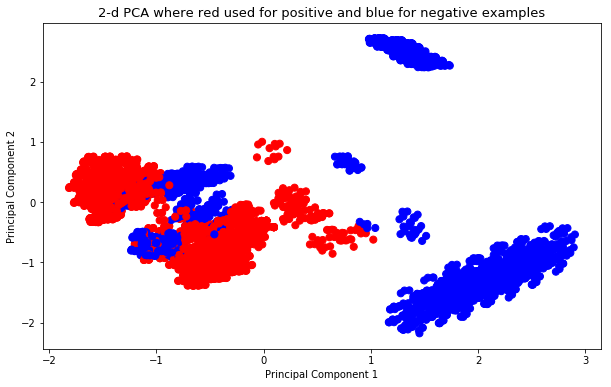

In [6]:
### def P2():

# Project training data down to 2 dimensions

pca_p2 = PCA(n_components=2)
pca_2dim = pca_p2.fit_transform(train_data)

fig = plt.figure(figsize= (10,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('2-d PCA where red used for positive and blue for negative examples', fontsize = 13)

# Set 'red' color for positive data and 'blue' for negative

col=ListedColormap(['r', 'b'])

# Plot 2-dimension data

plt.scatter(pca_2dim[:, 0], pca_2dim[:, 1], s=50, cmap=col, c=train_labels)
plt.show()

#P2()

In [7]:
#import seaborn as sn

#sn.FacetGrid(pca_df, hue = "Label", size= 6).map(plt.scatter,'Comp1','Comp2').add_legend()
#plt.show()

(3) Run KMeans with [1,16] clusters over the 2d projected data. Mark each centroid cluster and plot a circle that goes through the most distant point assigned to each cluster.

k = 1


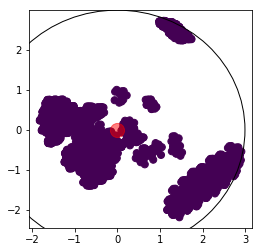

k = 2


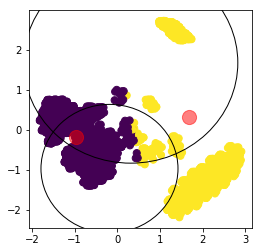

k = 3


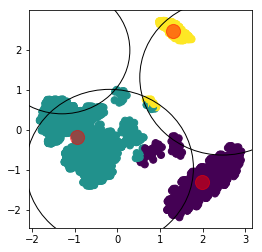

k = 4


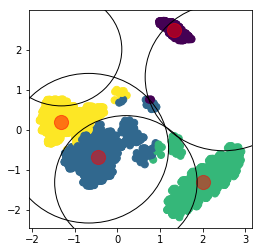

k = 5


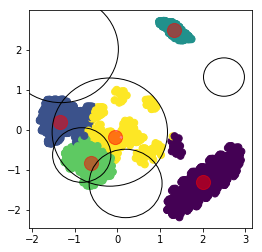

k = 6


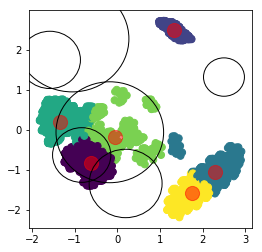

k = 7


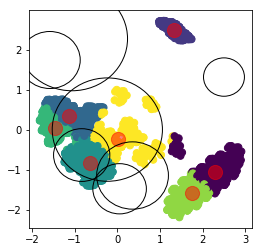

k = 8


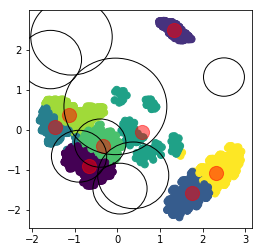

k = 9


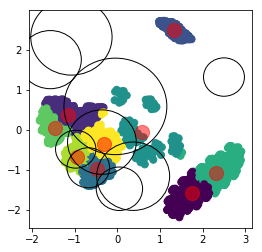

k = 10


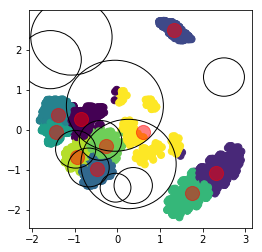

k = 11


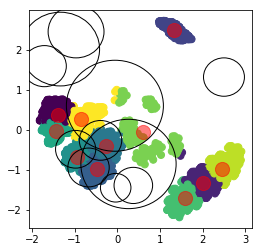

k = 12


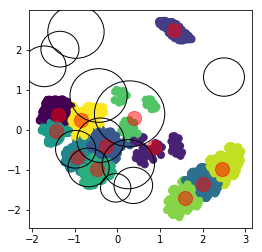

k = 13


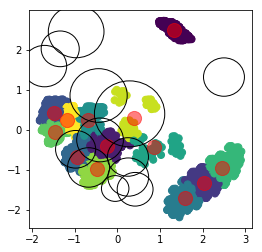

k = 14


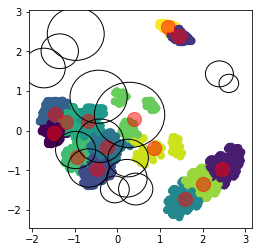

k = 15


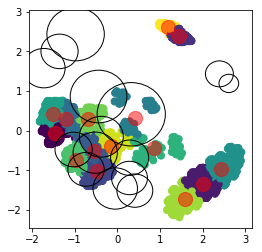

k = 16


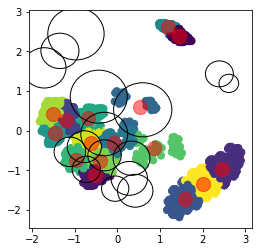

In [8]:
### P3()

for k in range(1,17):
    
    print("k = {}".format(k))
    
    kmeans = KMeans(n_clusters=k) # Fit Kmeans on 2-d projected data
    kmeans.fit(pca_2dim)
    cluster_assignments = kmeans.predict(pca_2dim) # Cluster Assignment

    # Max Distance determination
    
    cluster_distances = kmeans.transform(pca_2dim)
    max_distances = np.zeros(k)
    for i in range(len(cluster_distances)):
        if cluster_distances[i][cluster_assignments[i]] > max_distances[cluster_assignments[i]]:
            max_distances[cluster_assignments[i]] = cluster_distances[i][cluster_assignments[i]]
    
    fig = plt.figure(figsize= (4,4))
    ax = fig.add_subplot(1,1,1)
    
    # Mark Centroids for each clusters
    
    plt.scatter(pca_2dim[:, 0], pca_2dim[:, 1], c=cluster_assignments, s=50, cmap='viridis')
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
    
    # Plot a circle that goes through the most distant point assigned to each cluster
    
    for j in range(len(centers)):
            ax.add_patch(Circle((centers[j][1], centers[j][0]), max_distances[j], ec='black', fc='none'))

    plt.show()
    
### P3()

(4) Fit a Gaussian Mixture Model for the positive examples in your 2d projected data. Plot the estimated density contours as shown here: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py. Vary the number of mixture components from 1-4 and the covariance matrix type ('spherical', 'diag', 'tied', 'full').

Mixture Component = 1


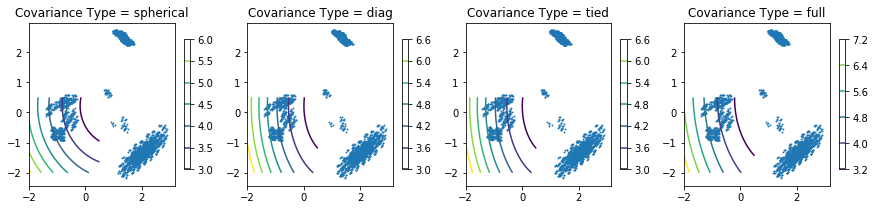

Mixture Component = 2


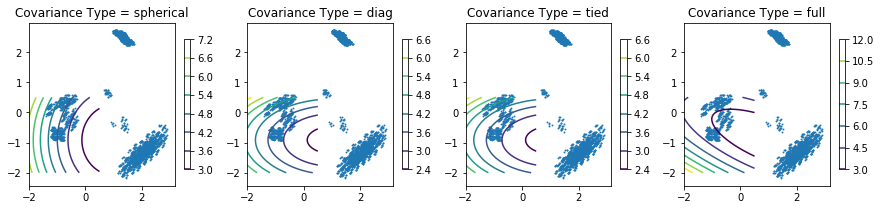

Mixture Component = 3


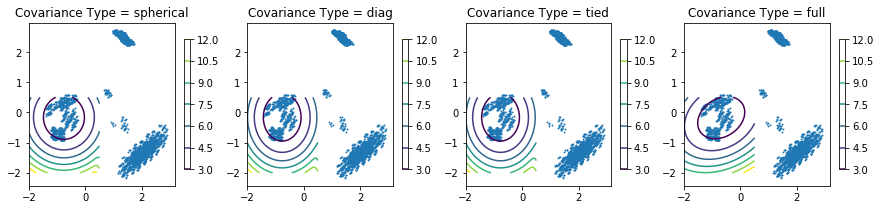

Mixture Component = 4


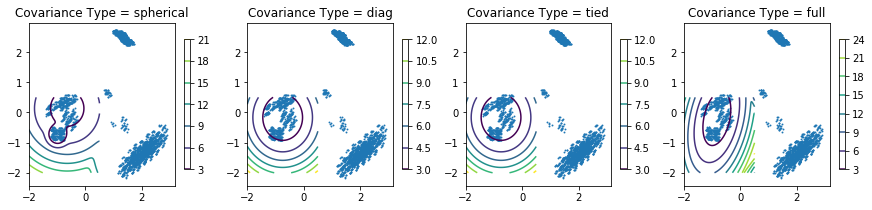

In [9]:
### P4()

# Consider only positive examples in 2d projected data

gmm_2dim_positive = pca_2dim[(np.where(train_labels == 1))]

'''
For mixture components from 1-4 and the covariance matrix type:
('spherical', 'diag', 'tied', 'full'),
draw the estimated density contours
'''
X, Y = np.meshgrid(np.linspace(-2, 0.5, 1000), np.linspace(-2,.5, 1000))
XX = np.array([X.ravel(), Y.ravel()]).T

for k in range(1,5):
    
    print("Mixture Component = {}".format(k))
    
    ## Co-variance type = 'spherical'
    
    gmm_spherical = mixture.GaussianMixture(n_components=k, covariance_type='spherical')
    gmm_spherical.fit(gmm_2dim_positive)
    
    Z_spherical = -gmm_spherical.score_samples(XX)
    Z_spherical = Z_spherical.reshape(X.shape)

        # display 'spherical' contour plot

    plt.figure(figsize=(15, 3))
    p = plt.subplot(141)
    plt.title('Covariance Type = spherical')
    CS = plt.contour(X, Y, Z_spherical)
    CB = plt.colorbar(CS, shrink=0.8, extend='both')
    p.scatter(gmm_2dim_positive[:, 0], gmm_2dim_positive[:, 1], .8)
    
    ## Co-variance type = 'diag'
    
    gmm_diag = mixture.GaussianMixture(n_components=k, covariance_type='diag')
    gmm_diag.fit(gmm_2dim_positive)
    
    Z_diag = -gmm_diag.score_samples(XX)
    Z_diag = Z_diag.reshape(X.shape)

        # display 'diag' contour plot

    p = plt.subplot(142)
    plt.title('Covariance Type = diag')
    CS = plt.contour(X, Y, Z_diag)
    CB = plt.colorbar(CS, shrink=0.8, extend='both')
    p.scatter(gmm_2dim_positive[:, 0], gmm_2dim_positive[:, 1], .8)
     
    
    ## Co-variance type = 'tied'
    
    gmm_tied = mixture.GaussianMixture(n_components=k, covariance_type='diag')
    gmm_tied.fit(gmm_2dim_positive)
    
    Z_tied = -gmm_tied.score_samples(XX)
    Z_tied = Z_tied.reshape(X.shape)

        # display 'diag' contour plot

    p = plt.subplot(143)
    plt.title('Covariance Type = tied')
    CS = plt.contour(X, Y, Z_tied)
    CB = plt.colorbar(CS, shrink=0.8, extend='both')
    p.scatter(gmm_2dim_positive[:, 0], gmm_2dim_positive[:, 1], .8)
    
    
    ## Co-variance type = 'full'
    gmm_full = mixture.GaussianMixture(n_components=k, covariance_type='full')
    gmm_full.fit(gmm_2dim_positive)
    
    Z_full = -gmm_full.score_samples(XX)
    Z_full = Z_full.reshape(X.shape)

        # display 'full' contour plot

    p = plt.subplot(144)
    plt.title('Covariance Type = full')
    CS = plt.contour(X, Y, Z_full)
    CB = plt.colorbar(CS, shrink=0.8, extend='both')
    p.scatter(gmm_2dim_positive[:, 0], gmm_2dim_positive[:, 1], .8)
           
    plt.show()
    
### P4()

(5) Fit two 4-component full covariance GMMs, one for the positive examples and one for the negative examples in your 2d projected data. Predict the test examples by choosing the label for which the model gives a larger probability (use GMM.score). What is the accuracy?

In [10]:
### P5()

np.random.seed(0)
# 4-component full covariance GMM for 2d projected positive data
gmm_2d_positive = train_data_2d[(np.where(train_labels == 1))]
gmm_plus = mixture.GaussianMixture(n_components=4, covariance_type='full')
gmm_plus.fit(gmm_2d_positive)


# 4-component full covariance GMM for 2d projected negative data

gmm_2d_negative = train_data_2d[(np.where(train_labels == 0))]
gmm_minus = mixture.GaussianMixture(n_components=4, covariance_type='full')
gmm_minus.fit(gmm_2d_negative)

# Using positive examples, calculate probability score

score_plus = gmm_plus.score_samples(test_data_2d) # Calculate probability score

# Using negative examples, calculate probability score

score_minus = gmm_minus.score_samples(test_data_2d) # Calculate probability score

## Predict the test examples by choosing the label for which the model gives a larger probability

pred = np.where(score_plus >= score_minus, 1, 0)

## Calculate Accuracy
accuracy = metrics.accuracy_score(test_labels,pred)
print('Accuracy = {0:.2%}'.format(accuracy))

### P5()

Accuracy = 94.31%


(6) Ideally, we'd like a model that gives the best accuracy with the fewest parameters. Run a series of experiments to find the model that gives the best accuracy with no more than 50 parameters. For example, with 3 PCA components and 2-component diagonal covariance GMMs, you'd have:

( (3 mean vector + 3 covariance matrix) x 2 components ) x 2 classes = 24 parameters

You should vary the number of PCA components, the number of GMM components, and the covariance type.

In [11]:
### P6():

# P is number PCA components, G is number of Gaussian Mixture components, 
# L is the number of labels / classes / categories.
P, G = np.meshgrid(np.arange(1, 25), np.arange(1, 26))
cond_spherical = 2*(P+1)*G <= 50
cond_diag = 4*P*G <= 50
cond_tied = P*(P+2*G+1) <= 50
cond_full = P*(P+3)*G <= 50
conditions = [cond_spherical, cond_diag, cond_tied, cond_full]
covar = ['spherical', 'diag', 'tied', 'full']
best_accuracy = 0.0
best_covar_type = None
best_P = None
best_G = None
# An empty array to store each new case
cases = np.empty((0,4))
for i,cond in enumerate(conditions):
    # For the 4 possible types of covariance matrix
    for p,g in np.column_stack((P[cond],G[cond])):
        # For all values of P and G that satisfy the condition (num_parameters <= 50)
        # Use P principal components
        pc_P = PCA(n_components=p)
        train_pc = pc_P.fit_transform(train_data)
        test_pc = pc_P.transform(test_data)
        # Create 2 GMMs, one per class, with C mixture components
        gmm_pos = GaussianMixture(n_components=g, covariance_type=covar[i],random_state=0)
        gmm_neg = GaussianMixture(n_components=g, covariance_type=covar[i],random_state=0)
        # Fit each GMM to the corresponding examples(poisonous and non-poisonous)
        gmm_pos.fit(train_pc[train_labels==1])
        gmm_neg.fit(train_pc[train_labels==0])
        # Compute the log probabilities under each model
        logprob_pos = gmm_pos.score_samples(test_pc)
        logprob_neg = gmm_neg.score_samples(test_pc)
        # Predict the type of mushroom after comparing probabilities
        predictions = np.where(logprob_pos >= logprob_neg, 1, 0)
        # Calculate the accuracy
        acc = metrics.accuracy_score(test_labels, predictions)
        # Include new case
        cases = np.append(cases, np.array([[p, g, i, acc]]), axis=0)
        if acc > best_accuracy:
            best_accuracy = acc
            best_P = p
            best_G = g
            best_covar_type = covar[i]
# Final result
if best_covar_type == 'spherical':
    num_parameters = 2*(best_P+1)*best_G
elif best_covar_type == 'diag':
    num_parameters = 4*best_P*best_G
elif best_covar_type == 'tied':
    num_parameters = best_P*(best_P+2*best_G+1)
elif best_covar_type == 'full':
    num_parameters = best_P*(best_P+3)*best_G

# Sort all cases (in descending order of the accuracy)
cases = cases[cases[:, 3].argsort()[::-1], :]
# Draw a table with all of them
Results = [' Case', '  P', '  G', ' Covariance matrix type', ' Accuracy']
print("\n|{}|{}|{}|{}|{}|".format(*Results))
print('-------------------------------------------------')
table = []
for i,case in enumerate(cases):
    table.append([i+1, int(case[0]), int(case[1]), covar[int(case[2])].rjust(23), case[3]])
for row in table:
    print("|{:5}|{:3}|{:3}|{}|{:9.4f}|".format(*row))

    

print(' Best Model < 50 parameters is with {0} PCA COMPONENTS AND {1}-COMPONENT {2} COVARIANCE GMMs'.format(best_P, best_G, best_covar_type))
print('({0} parameters) and the Accuracy is {1:.2f}%\n'.format(num_parameters, 100*best_accuracy))


### P6()


| Case|  P|  G| Covariance matrix type| Accuracy|
-------------------------------------------------
|    1|  7|  3|              spherical|   0.9733|
|    2|  4|  3|                   tied|   0.9698|
|    3|  6|  3|              spherical|   0.9680|
|    4|  5|  4|              spherical|   0.9680|
|    5|  5|  3|              spherical|   0.9662|
|    6|  3|  5|              spherical|   0.9617|
|    7|  5|  2|                   tied|   0.9617|
|    8|  3|  4|              spherical|   0.9600|
|    9|  4|  4|              spherical|   0.9573|
|   10|  2| 10|                   tied|   0.9573|
|   11|  2| 11|                   tied|   0.9564|
|   12|  3|  4|                   diag|   0.9555|
|   13|  3|  6|              spherical|   0.9555|
|   14|  2|  9|                   tied|   0.9546|
|   15|  4|  5|              spherical|   0.9537|
|   16|  2|  8|              spherical|   0.9528|
|   17|  2|  8|                   tied|   0.9520|
|   18|  3|  4|                   tied|   0.9502|

**Best Model < 50 parameters is with 7 PCA COMPONENTS AND 3-COMPONENT spherical COVARIANCE GMMs
(48 parameters) and the Accuracy is 97.33% **